# Project 2

### Candidate numbers: 10044, 10066,10010

# Introduction

Mathematical methods have become increasingly prevalent as a practical tool for the understanding of complex data and offering intelligent processing to help save people time and effort. A Fourier transform is a mathematical transform that decomposes functions into frequency components, which are represented by the output of the transform as a function of frequency. The Fourier Transform is an important signal and image processing tool which is used to decompose an image into its sine and cosine components.  Fourier  transform  is  very  important  for  representing  a  signal  in  the frequency  domain,  it  is  also  important  for  calculating  a  system’s  response (convolution). 

In this project we will use discrete fourier transforms(periodic) for  signal processing and to remove dot artefacts.

$\newcommand{\norm}[1]{\left\lVert #1 \right\rVert}$
$\newcommand{\inprod}[2]{\left\langle#1,#2\right\rangle}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.image as mpimg
import cv2

## Task 1

Want to look at discrete Fourier Transform. Will look at one preiodic functions on the interval $\mathbb{T}=[0,1)$ (or $\left[\frac{1}{2},\frac{1}{2}\right)$). Let

$$
L^2(\mathbb{T}) = \left\{f:\mathbb{T}\to\mathbb{R}\bigg|\int_0^1 |f(x)|^2\ dx < \infty \right\},
$$

and the inner product for $f,g\in L^2(\mathcal{T})$ be defined as

$$
\inprod{f}{g} = \int_0^1 f(x)\overline{g(x)}\ dx.
$$

Could also define the inner product by integrating from $-\frac{1}{2}$ to $\frac{1}{2}$, will give the same result since we only look at periodic functions with period $T=1$.

### a)

Want to first show that the functions $e^{2\pi ikx}$, $k\in\mathbb{Z}$,$x\in\mathbb{T}$ for any $k,h\in\mathbb{Z}$ satisfy

\begin{align}
    \inprod{e^{2\pi ik\cdot}}{e^{2\pi ih\cdot}} = \begin{cases}
    1 &\quad h=k\\
    0 &\quad h\neq k
    \end{cases}.
\end{align}

The case of $h=k$ gives

$$
\inprod{e^{2\pi ik\cdot}}{e^{2\pi ik\cdot}} = \int_0^1 e^{2\pi ikx}e^{-2\pi ikx}\ dx = \int_0^1 1\ dx = 1,
$$

while for $k\neq h$ we have

$$
\inprod{e^{2\pi ik\cdot}}{e^{2\pi ih\cdot}} = \int_0^1 e^{2\pi ikx}e^{-2\pi ihx}\ dx = \frac{1}{2\pi i (k-h)}\left[e^{2\pi i(k-h)x}\right]_0^1 = \frac{1}{2\pi i (k-h)}\left(e^{2\pi i(k-h)}-1\right) = 0
$$

since $k-h \in \mathbb{Z}$ and $k=h\neq 0$.

### b)

Now it will be shown that the functions $\sqrt{2}\sin{(2\pi mx)}$, $m= 1,\dots$, $\cos{(2\pi 0x)}$ and $\sqrt{2}\cos{(2\pi nx)}$, $n= 1,\dots$ form an orthonormal system. Will first look at $\inprod{\sqrt{2}\sin{(2\pi mx)}}{\sqrt{2}\cos{(2\pi nx)}}$.<br>
$n=0$:

$$
\inprod{\sqrt{2}\sin{(2\pi m\cdot)}}{\cos{(2\pi 0\cdot)}} = \sqrt{2}\int_0^1\sin{(2\pi mx)}\ dx = \frac{1}{\sqrt{2}\pi m}\big[-\cos{(2\pi m x)}\big]_0^1 = 0
$$

$n = m$:

\begin{align*}
    \inprod{\sqrt{2}\sin{(2\pi m\cdot)}}{\sqrt{2}\cos{(2\pi m\cdot)}} &= 2\int_0^1\sin{(2\pi mx)}\cos{(2\pi mx)}\ dx = \int_0^1 \sin{4\pi m x}\ dx \\
    & = \frac{1}{4\pi m}\big[-\cos{(4\pi m x)} \big]_0^1 = 0
\end{align*}

$n,m\geq 1$, $m\neq n$:

\begin{align*}
    \inprod{\sqrt{2}\sin{(2\pi m\cdot)}}{\sqrt{2}\cos{(2\pi n\cdot)}} &= 2\int_0^1\sin{(2\pi mx)}\cos{(2\pi nx)}\ dx = \int_0^1 \sin{(2\pi(n+m)x)} - \sin{(2\pi(n-m)x)}\ dx\\
    & = \frac{1}{2\pi(n+m)}\big[-\cos{(2\pi(n+m)x)}\big]_0^1 - \frac{1}{2\pi(n-m)}\big[-\cos{(2\pi(n-m)x)}\big]_0^1 = 0
\end{align*}

Next, will look at $\inprod{\sqrt{2}\sin{(2\pi mx)}}{\sqrt{2}\sin{(2\pi nx)}}$ for $m,n\in\{1,2,\dots\}$.<br>
$m = n$:

\begin{align*}
    \inprod{\sqrt{2}\sin{(2\pi m\cdot)}}{\sqrt{2}\sin{(2\pi m\cdot)}} &= 2\int_0^1\sin^2{(2\pi mx)}\ dx = \int_0^1 1 -\cos{(4\pi mx)}\ dx \\
    &= 1-\frac{1}{4\pi m}\big[\sin{(4\pi mx)}\big]_0^1 = 1
\end{align*}

$m\neq n$:

\begin{align*}
    \inprod{\sqrt{2}\sin{(2\pi m\cdot)}}{\sqrt{2}\sin{(2\pi n\cdot)}} &= 2\int_0^1\sin^2{(2\pi nx)}\ dx = \int_0^1 \cos{(2\pi(n-m)x)} -\cos{(2\pi(n+m)x)}\ dx \\
    &= \frac{1}{2\pi(n-m)}\big[\sin{(2\pi(n-m)x)}\big]_0^1 - \frac{1}{2\pi(n+m)}\big[\sin{(2\pi(n+m)x)}\big]_0^1 = 0
\end{align*}

Next, will look at $\inprod{\sqrt{2}\cos{(2\pi mx)}}{\sqrt{2}\cos{(2\pi nx)}}$ for $m,n\in\{0,1,\dots\}$.<br>
$m\neq n$:

\begin{align*}
    \inprod{\sqrt{2}\cos{(2\pi m\cdot)}}{\sqrt{2}\cos{(2\pi n\cdot)}} &= 2\int_0^1\sin^2{(2\pi nx)}\ dx = \int_0^1 \cos{(2\pi(n-m)x)} +\cos{(2\pi(n+m)x)}\ dx \\
    &= \frac{1}{2\pi(n-m)}\big[\sin{(2\pi(n-m)x)}\big]_0^1 + \frac{1}{2\pi(n+m)}\big[\sin{(2\pi(n+m)x)}\big]_0^1 = 0
\end{align*}

$m=n\neq 0$:

\begin{align*}
    \inprod{\sqrt{2}\cos{(2\pi m\cdot)}}{\sqrt{2}\cos{(2\pi m\cdot)}} &= 2\int_0^1\cos^2{(2\pi mx)}\ dx = \int_0^1 1 +\cos{(4\pi mx)}\ dx \\
    &= 1+\frac{1}{4\pi m}\big[\sin{(4\pi mx)}\big]_0^1 = 1
\end{align*}

$m=n=0$:

\begin{align*}
    \inprod{\sqrt{2}\cos{(2\pi 0\cdot)}}{\sqrt{2}\cos{(2\pi 0\cdot)}} = 2\int_0^1 1\ dx = 2 \Leftrightarrow \inprod{\cos{(2\pi 0\cdot)}}{\cos{(2\pi 0\cdot)}} = 1
\end{align*}

Thus, $\sqrt{2}\sin{(2\pi mx)}$, $m= 1,\dots$, $\cos{(2\pi 0x)}$ and $\sqrt{2}\cos{(2\pi nx)}$, $n= 1,\dots$ forms an orhtonormal system.

### c)

we introduce two spaces and find an othonormal basis for them, the first being

$$
\mathcal{T}_n := \text{span}\left(e^{-2\pi i n \cdot},\dots,e^{2\pi i n \cdot}\right) = \left\{f\hspace{0.2cm} \bigg|\hspace{0.2cm} f(x) = \sum_{k =-n}^n c_k e^{2\pi i kx}, \text{ where } c_{-n},\dots,c_n\in\mathbb{C}\right\}
$$

restricted to when $c_k = \overline{c_{-k}}$. The second space is

\begin{align*}
\mathcal{S}_n :&= \text{span}\left(\cos{(0\pi\cdot)},\cos{(2\pi\cdot)},\dots \cos{(2\pi n\cdot)},\sin{(2\pi\cdot)},\dots,\sin{(2\pi n\cdot)}\right)\\
&= \left\{f\hspace{0.2cm} \bigg|\hspace{0.2cm} f(x) = \frac{a_0}{2} \sum_{k =1}^n a_k \cos{(2\pi n x)}+b_k\sin{(2\pi n x)}, \text{ where } a_{0},\dots,a_n,b_1,\dots,b_n\in\mathbb{R}\right\}
\end{align*}

From 1a) it is known that $\left\{e^{-2\pi i n \cdot},\dots,e^{2\pi i n \cdot}\right\}$ is an orthonormal set, since $\mathcal{T}_n := \text{span}\left(e^{-2\pi i n \cdot},\dots,e^{2\pi i n \cdot}\right)$ this set must form an orthonormal basis for $\mathcal{T}_n$. <br>
Similar argument for a orthonormal basis for $\mathcal{S}_n$, where in 1b) it was shown that $\sqrt{2}\sin{(2\pi mx)}$, $m= 1,\dots$, $\cos{(2\pi 0x)}$ and $\sqrt{2}\cos{(2\pi nx)}$, $n= 1,\dots$ forms an orthonormal set, and thus can be used as an orthonormal basis for $\mathcal{S}_n$.

Using Euler's formula it is possible to rewrite an element in $\mathcal{T}_n$, have that

$$
c_k e^{2\pi i k x} + c_{-k} e^{-2\pi i k x} = (c_k+\overline{c_k})\cos{(2\pi i k x)} + i(c_k-\overline{c_k})\sin{(2\pi i k x)} = 2\text{Re}(c_k)\cos{(2\pi i k x)} - 2\text{Im}(c_k)\sin{(2\pi i k x)}
$$

Thus be defining $a_0 = 2c_0$, $a_k = 2\text{Re}(c_k)$ and $b_k = -2\text{Im}(c_k)$ it is possible to write

$$
f(x) = \sum_{k =-n}^n c_k e^{2\pi i kx} = \frac{a_0}{2} \sum_{k =1}^n a_k \cos{(2\pi n x)}+b_k\sin{(2\pi n x)},
$$

which means that any element in $\mathcal{T}_n$ is also an elemnt in $\mathcal{S}_n$. Can do the same the other way to show that any element in $\mathcal{S}_n$ is also an element in $\mathcal{T}_n$, which means that $\mathcal{T}_n = \mathcal{S}_n$. Since $\mathcal{T}_n$ is spannde by $2n+1$ vectors, which are linearly independent since they are othonormal, and thus $\text{dim}(\mathcal{T}_n)=2n+1$.

### d)

Now it will be shown that the *Fourier coefficients* $a_0,a_1\dots,a_n,b_1,\dots,b_n$ can be computed from

\begin{align*}
    a_k &= 2\inprod{f}{\cos{(2\pi k \cdot)}} = 2\int_{-\frac{1}{2}}^{\frac{1}{2}} f(x)\cos{(2\pi k x)} \ dx \hspace{0.5cm} k=0,1,\dots\\
    b_k &= 2\inprod{f}{\sin{(2\pi k \cdot)}} = 2\int_{-\frac{1}{2}}^{\frac{1}{2}} f(x)\sin{(2\pi k x)} \ dx \hspace{0.5cm} k=1,2,\dots
\end{align*}

Writing $f$ as its *Fourier series* with $L=\frac{1}{2}$ gives that

$$
f(x) = \frac{a_0}{2}+\sum_{k =1}^n a_k \cos{(2\pi n x)}+b_k\sin{(2\pi n x)}
$$

using that $\sqrt{2}\sin{(2\pi mx)}$, $m= 1,\dots$, $\cos{(2\pi 0x)}$ and $\sqrt{2}\cos{(2\pi nx)}$, $n= 1,\dots$ forms an orthonormal basis gives that

\begin{align*}
    2\inprod{f}{\cos{(2\pi k \cdot)}} &= 2\int_{-\frac{1}{2}}^{\frac{1}{2}} f(x)\cos{(2\pi k x)} = 2\int_{-\frac{1}{2}}^{\frac{1}{2}} a_k\cos{(2\pi k i)}\cos{(2\pi k x)} = 2\cdot \frac{a_k}{2} = a_k \hspace{0.5cm} k=0,1,\dots\\
    2\inprod{f}{\sin{(2\pi k \cdot)}} &= 2\int_{-\frac{1}{2}}^{\frac{1}{2}} f(x)\sin{(2\pi k x)} = 2\int_{-\frac{1}{2}}^{\frac{1}{2}} b_k\sin{(2\pi k i)}\sin{(2\pi k x)} = 2\cdot \frac{b_k}{2} = b_k \hspace{0.5cm} k=1,2,\dots
\end{align*}.

By similar argument it can be shown that

$$
c_k = \inprod{f}{e^{2\pi i k\cdot}} = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) e^{-2\pi i k x}\ dx
$$

### e)

For numerics we want to approximate the integral for the *Fourier coeffiecients* $c_k$ for a function $f$. Here we want to used equidistant points $x_0,\dots,x_{N-1}$, $x_j = \frac{j}{N}$ for some $N\in\mathbb{N}$, and introduce the notation $f_j = f(x_j)$ and $\pmb{f}=(f_0,\dots,f_{N-1})$. Will approximate the *Fourier coeffiecients* using the composite trapezoidal rule. Will use points $x_0,\dots,x_N$, $x_j = \frac{j}{N}$ and then show that the last point is not needed since $f$ is periodic with period $T=1$.

\begin{align*}
    c_k &= \inprod{f}{e^{2\pi i k\cdot}} = \int_0^1 f(x) e^{-2\pi i k x}\ dx \approx \sum_{j=0}^{N-1}\frac{x_{j+1}-x_j}{2}(f(x_j)e^{-2\pi i k x_j}+f(x_{j+1})e^{-2\pi i k x_{j+1}})\\
    & = \frac{1}{2N}\sum_{j=0}^{N-1}(f_je^{-2\pi i k x_j}+f_{j+1}e^{-2\pi i k x_{j+1}}) = \frac{1}{2N}f_0 e^{-2\pi i k x_{0}} + \frac{1}{N}\sum_{j=1}^{N-1}f_je^{-2\pi i k x_j}+\frac{1}{2N}f_N e^{-2\pi i k x_{N}}\\
    &= \frac{1}{N}\sum_{j=0}^{N-1}f_je^{-2\pi i k x_j} =: \hat{f}_k,
\end{align*}

since $f(x)$ and $e^{-2\pi i k x}$ is periodic with period $T=1$, and thus $f_N e^{-2\pi i k x_{N}} = f_0 e^{-2\pi i k x_{0}}$. This also gives that

$$
\hat{f}_{N+k} = \frac{1}{N}\sum_{j=0}^{N-1}f_{j}e^{-2\pi i (k+N) x_{j}} = \frac{1}{N}\sum_{j=0}^{N-1}f_{j}e^{-2\pi i k x_{j}} e^{-2\pi i j} = \frac{1}{N}\sum_{j=0}^{N-1}f_{j}e^{-2\pi i k x_{j}} = \hat{f}_k.
$$

This means that the Fourier coeffiecients are almost equal to the Discrete Fourier Transform and are almost N-periodeic.

### f)

Want to now prove that 

\begin{align*}
\frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i k j/N} = \begin{cases}
    1 &\quad k \bmod N = 0\\
    0&\quad \text{else}
\end{cases}
\end{align*}

Will prove that this holds for $k\bmod N = 0 \Leftrightarrow k=aN$ $a\in\mathbb{Z}$ and for $k\bmod N \neq 0$.<br>
$k = aN$:

$$
\frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i k j/N} = \frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i a j} = \frac{1}{N}\sum_{j=0}^{N-1} 1 = 1
$$

$k \neq aN$

$$
\frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i k j/N} = \frac{1}{N}\sum_{j=0}^{N-1}\left(e^{-2\pi i k/N}\right)^j = \frac{1}{N}\frac{e^{-2\pi i k}-1}{e^{-2\pi i k/N}-1} = 0,
$$

since $e^{-2\pi i k} = 1$ as $k\in\mathbb{Z}$.

### g)

Will now collect the Fourier transform into a matrix, i.e. we write $\pmb{\hat{f}}=\mathcal{F}_N\pmb{f}$ with $\mathcal{F}\in\mathbb{C}^{N\times N}$ given by

$$
\mathcal{F}_N = \frac{1}{N}\big(e^{-2\pi i kl/N}\big)_{k,l=0}^{N-1}
$$

Futhermore, we introduce the *circulant matrix* for a vector $\pmb{a}=(a_0,\dots,a_{N-1})^T$ defined by

\begin{align}
\text{circ }\pmb{a} = \big(a_{l-l\bmod N}\big)_{k,l=0}^{N-1} =
\begin{pmatrix}
a_0&a_{N-1}&\dots&a_{2}&a_{1}\\
a_{1}&a_{0}&\dots&a_{3}&a_{2}\\
\vdots & &\ddots & & \vdots\\
a_{N-1}&a_{N-2}&\dots& a_{1}& a_{0}
\end{pmatrix}
\end{align}

Want to show that $\text{circ }\pmb{a}$ is diagonalizable by $\mathcal{F}_N$, i.e. using $\pmb{\hat{a}}=\mathcal{F}_N\pmb{a}$ we get

$$
\text{circ }\pmb{a} = N^2\overline{\mathcal{F}_N}\text{diag}(\pmb{\hat{a}})\mathcal{F}_N.
$$

Will show this by considering a single element in $\text{circ }\pmb{a}$, i.e. in row $k$ and coloumn $l$, which gives

\begin{align}
    (\text{circ }\pmb{a})_{kl} = N^2\cdot \frac{1}{N}\big(e^{2\pi i rk/N}\big)_{r=0}^{N-1}\cdot \frac{1}{N}\big(\hat{a}_re^{-2\pi i rl/N}\big)_{r=0}^{N-1} = \sum_{r=0}^{N-1}\hat{a}_r e^{-2\pi i r(l-k)/N}.
\end{align}

Using that $\hat{a}_r = \frac{1}{N}\sum_{n=0}^{N-1}a_n e^{-2\pi i rn/N}$ gives that

\begin{align*}
    (\text{circ }\pmb{a})_{kl} &= \frac{1}{N}\sum_{r=0}^{N-1}\sum_{n=0}^{N-1}a_n e^{-2\pi i rn/N} e^{-2\pi i r(l-k)/N} = \frac{1}{N}\sum_{n=0}^{N-1}\sum_{r=0}^{N-1}a_n e^{-2\pi i rn/N} e^{-2\pi i r(l-k)/N}\\
    &= \frac{1}{N^3}\sum_{n=0}^{N-1}a_n\sum_{r=0}^{N-1}e^{-2\pi i r(l-k+n)/N}
\end{align*}

From 1f) it is known that

\begin{align}
\frac{1}{N}\sum_{r=0}^{N-1}e^{-2\pi i r(l-k+n)/N} = \begin{cases}
1&\quad (l-k+n)\bmod N = 0\\
0&\quad \text{else}
\end{cases},
\end{align}

which in this case means that the sum equals 1 when $n=qN+k-l$. Since $n\in\{0,\dots,N_1\}$ it must be that $n=k-l$ when $k\geq l$ and $n=N+k-l$ when $k < l$. Thus, it must be that

\begin{align}
(N^2\overline{\mathcal{F}_N}\text{diag}(\pmb{\hat{a}})\mathcal{F}_N)_{kl} = \begin{cases}
a_{k-l}&\quad k\geq l\\
a_{N+k--}&\quad k < l
\end{cases} = a_{k-l\bmod N}.
\end{align}

Thus it must be that $\text{circ }\pmb{a} = N^2\overline{\mathcal{F}_N}\text{diag}(\pmb{\hat{a}})\mathcal{F}_N$.

Using this it can be shown that $\mathcal{F}_N^{-1} =N \overline{\mathcal{F}_N}$. Using the vector $\pmb{a} = (1,0,\dots,0)^T$ gives that $\text{circ }\pmb{a} = I$ and $\pmb{\hat{a}} = (\frac{1}{N},\frac{1}{N},\dots,\frac{1}{N})$. Inserting this gives that

$$
I = N\overline{\mathcal{F}_N}\mathcal{F}_N \Rightarrow \mathcal{F}_N^{-1} =N \overline{\mathcal{F}_N}.
$$

### h)

The function below creates the vector $\pmb{f}=(f_0,\dots,f_{N-1})^T$ from a given function $f$ and number of samples $N$. The optional value gives tha interval $\pmb{f}$ is created on, will create on interval $[\text{start},\text{start}+1)$.

In [2]:
def transform(f,N,start = 0):
    
    x = np.linspace(start,start+1,N, endpoint=False)
    
    return f(x)

def f1(x):
    return np.sin(8*np.pi*x)

def f2(x):
    return np.sin(32*np.pi*x)+np.cos(128*np.pi*x)

def f3(x):
    return x

def f4(x):
    return 1-np.abs(x)

In the cell block under $\pmb{f}$ and $\pmb{\hat{f}}$ are plottet on the interval $\left[-\frac{1}{2},\frac{1}{2}\right)$ for the functions defined in the cell above and for $N=5,17,257$. For $\pmb{\hat{f}}$ the real part and imaginary part are plottet in the same plot.

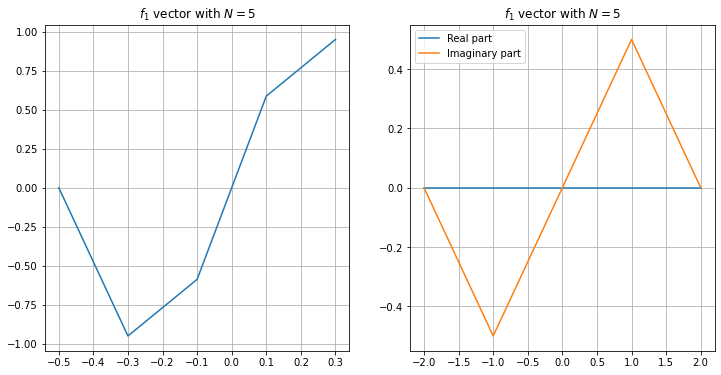

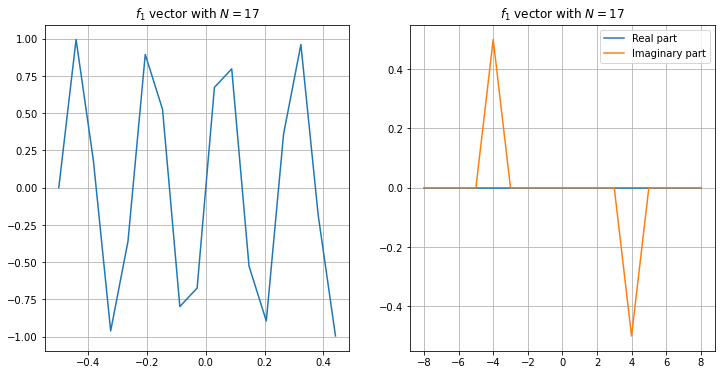

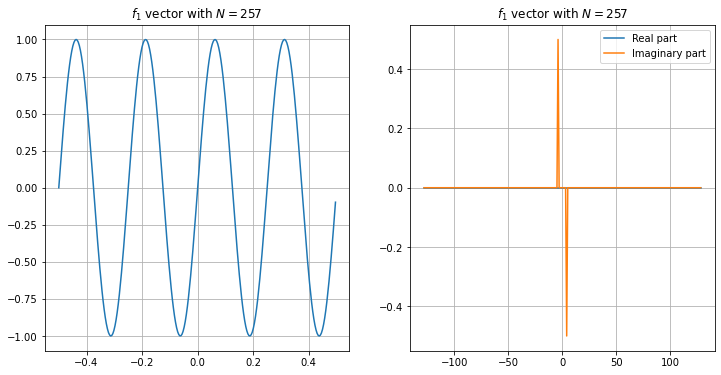

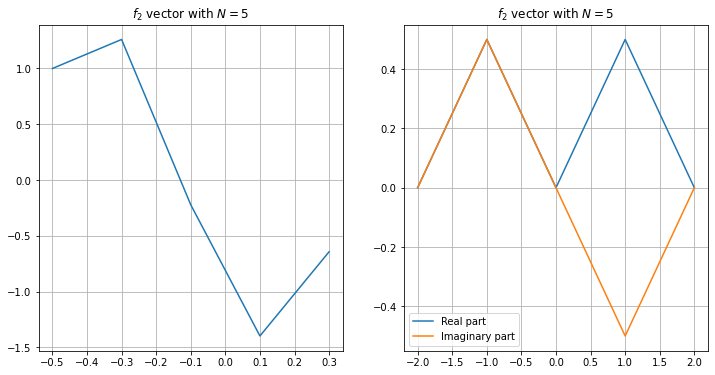

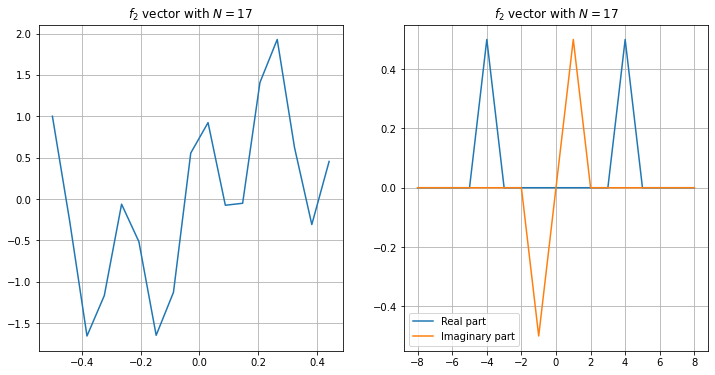

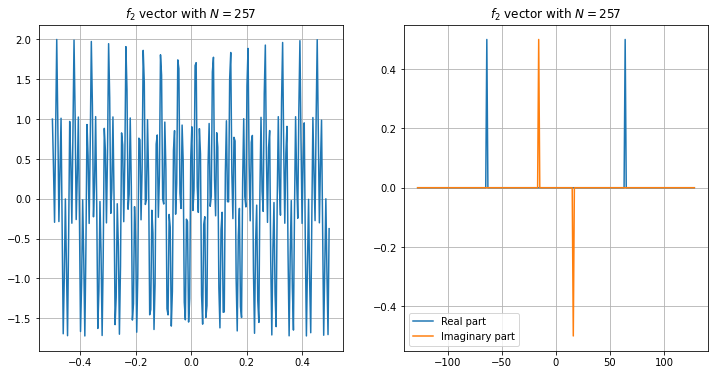

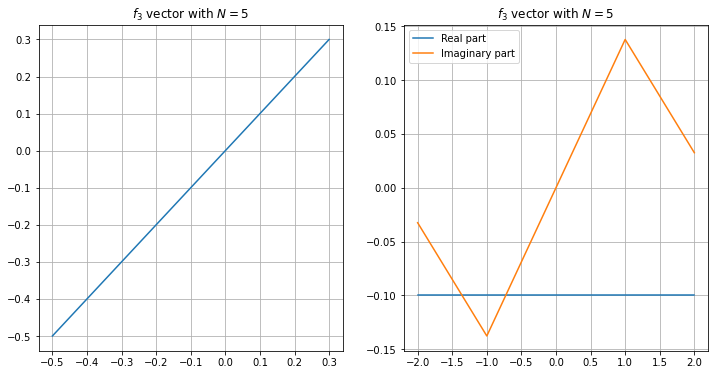

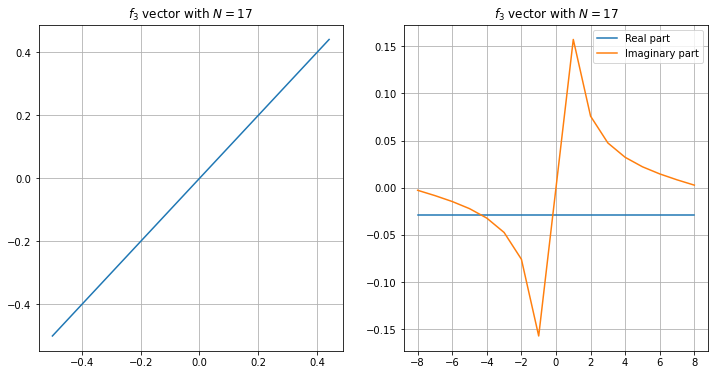

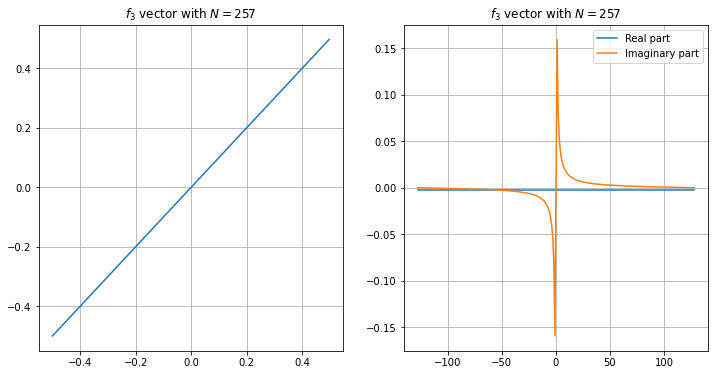

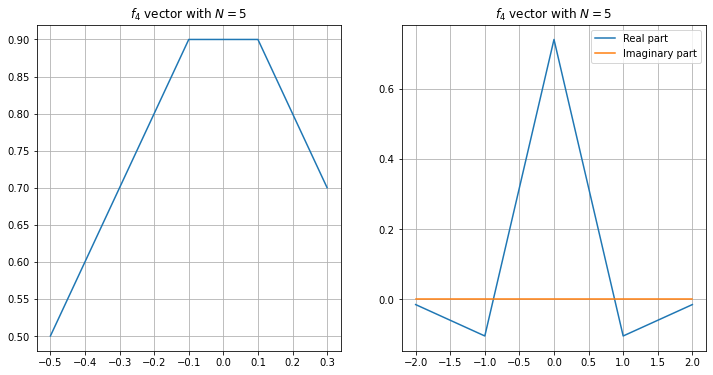

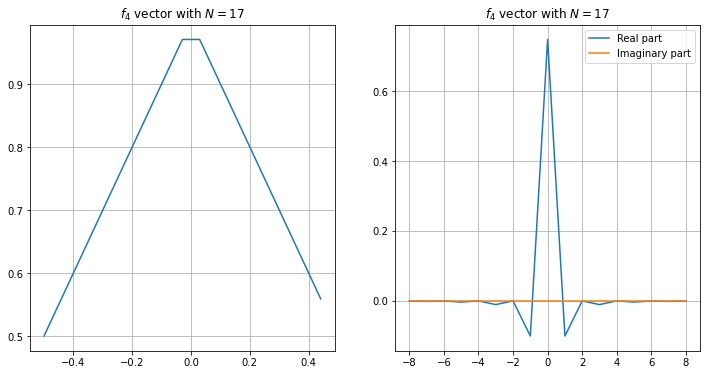

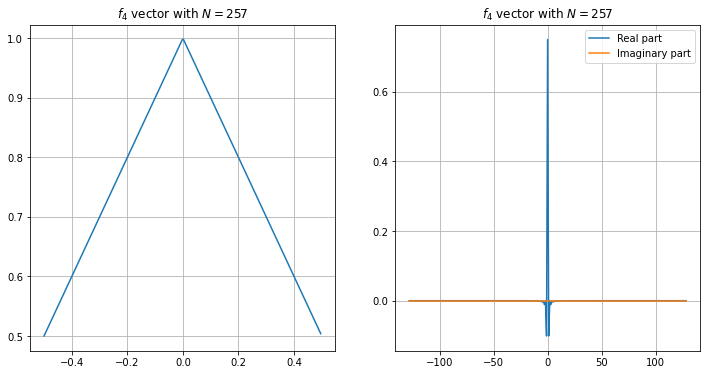

In [3]:
start = -0.5
N_array = [5,17,257]

func_array = [f1,f2,f3,f4]

for i,func in enumerate(func_array):
    for N in N_array:
        xgrid = np.linspace(start,start+1,N, endpoint=False)
        wgrid = fftfreq(N, xgrid[1]-xgrid[0])
        order = np.argsort(wgrid)
        wgrid = wgrid[order]
        f_vec = transform(func,N,start)
        
        fhat_vec = fft(f_vec)[order]/N
        
        fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
        
        ax1.plot(xgrid,f_vec)
        ax1.set_title(f"$f_{i+1}$ vector with $N=${N}")
        ax1.grid(True)
        
        ax2.plot(wgrid,np.real(fhat_vec), label = "Real part")
        ax2.plot(wgrid,np.imag(fhat_vec), label = "Imaginary part")
        ax2.set_title(f"$f_{i+1}$ vector with $N=${N}")
        ax2.grid(True)
        ax2.legend()
        
        plt.show()

It is clear that both $f_1$ and $f_2$ are best representet when $N=257$, however $f_3,f_4$ have a equally good representation for $N=5,17,257$ because they are piecewise independent. 

### i)

Plotting $\hat{f}_2$ for $N=17,65,257$ after using the fftshift function from scipy.

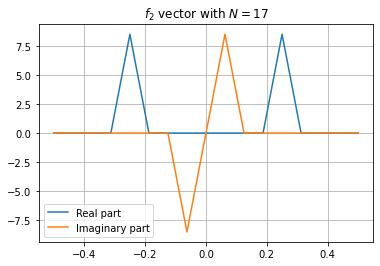

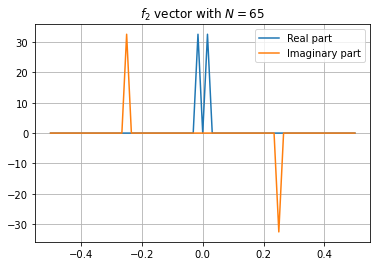

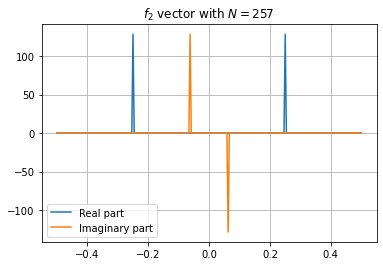

In [4]:
start = -0.5
N_array = [17,65,257]

for N in N_array:
    
    xgrid = np.linspace(start,start+1,N)
    fhat_shift = fftshift(fft(transform(f2,N,start)))
    
    fig, ax = plt.subplots()

    ax.plot(xgrid,np.real(fhat_shift), label = "Real part")
    ax.plot(xgrid,np.imag(fhat_shift), label = "Imaginary part")
    ax.set_title(f"$f_2$ vector with $N=${N}")
    ax.grid(True)
    ax.legend()

    plt.show()

Since $f_2$ is a linear combination of trigonometric functions, it is its own Fourier transform. Thus, it must be that $a_{16}(f_2) = 1$, $a_k(f_2) = 0$ for $k\neq 16$, $b_{64}(f_2)=1$ and $b_k(f_2) = 0$ for $k\neq 16$. For the complex varient, $f_2$ can be rewriten as

$$
f_2(x) = \frac{1}{2}(e^{128\pi i x}+e^{-128\pi i x}) +\frac{i}{2}(e^{32\pi i x}-e^{-32\pi i x}).
$$

Since in this case $f_2$ is its own complex Fourier series ut must be that $c_{64}=c_{-64} = \frac{1}{2},c_{16}=-\frac{i}{2},c_{-16}=\frac{i}{2}$ and $c_k = 0$ for $k \notin \{-64,-16,16,64\}$.

The fftshift-function takes a list of frequencies as input, and shifts the zero-frequency component to the center of the spectrum. 

Suppose we get the array with frequencies $freq = [0, -1, 1, -2, 2]$. If we run fftshift on freq, we will get this array $freq' = [-1, 1, 0, -2, 2]$

We can also specify which axis we want to move the zero along. 

## Task 2

Now the the discrete Fourier coefficients will be combine with interpolation. It is assumed that $f_\mathbb{T}\to\mathbb{C}$ can be written by its Fourier coefficients $c_k(f)$ as

$$
f(x)=\sum_{k\in\mathbb{Z}} c_k(f)e^{2\pi i k x},
$$

where it is assumed that the sum converges absolutely and uniformly.<br>
Furthermore, we conside shifts in functions, that is $\tau_N f = f(\cdot-\frac{1}{N})$, that shifts the function by $\frac{1}{N}$ to the right. We can write $\tau_N^j f = f(\cdot-\frac{j}{N})$, which means that $\tau_N^N f = f$.

We define the *space of translations* as

$$
V_{N,f} = \text{span}(f,\tau_N f,\tau_N^2 f,\dots,\tau_N^{N-1} f).
$$

Thus,  $g\in V_{N,f} \Leftrightarrow $ there exists $a_0,\dots, a_{N-1}$ s.t. $g(x)=\sum_{k=0}^{N-1}a_k f\left(x-\frac{k}{N}\right)$

### a)

Will here prove the *Aliasing formula*, i.e. for any $N\in\mathbb{N}$ we have that the continous function $f$ with uniformly convergent Fourier series that

$$
\hat{f}_k = \sum_{l\in\mathbb{Z}}c_{k+lN}(f) \hspace{0.5cm} k\in\mathbb{Z}.
$$

Have that

\begin{align}
    \hat{f}_k = \frac{1}{N}\sum_{j=0}^{N-1} f\left(\frac{j}{N}\right) e^{-2\pi i j k/N} = \frac{1}{N}\sum_{j=0}^{N-1}\sum_{q\in\mathbb{Z}} c_q(f)e^{2\pi i j q/N} e^{-2\pi i j k/N} = \sum_{q\in\mathbb{Z}}c_q(f)\frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i j(k-q)/N}.
\end{align}

Can change the summation order since the fourier series converges absolutely and uniformly. From 1f) it is known that

\begin{align}
    \frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i (k-j)/N} = \begin{cases}
    1 &\quad k-q\bmod N = 0\\
    0&\quad \text{else},
    \end{cases}
\end{align}

which means that the sum is only equal to $1$ when $q=k+lN$, Thus

\begin{align}
    \hat{f}_k  = \sum_{q\in\mathbb{Z}}c_q(f)\frac{1}{N}\sum_{j=0}^{N-1}e^{-2\pi i j(k-q)/N} = \sum_{l\in\mathbb{Z}} c_{k+lN}(f)
\end{align}

### b)

Want to now show that for a given $f$ and its Fourier coefficient $c_k(f)$, $k\in\mathbb{Z}$ that

$$
c_k(\tau_N f) = e^{-2\pi i k/N}c_k(f).
$$

Have that

\begin{align}
    c_k(\tau_N f) &= \int_{-\frac{1}{2}}^{\frac{1}{2}} f\left(x-\frac{1}{N}\right)e^{-2\pi i k x}\ dx = \int_{-\frac{1}{2}-\frac{1}{N}}^{\frac{1}{2}-\frac{1}{N}} f\left(x\right)e^{-2\pi i k (y+\frac{1}{N})}\ dy\\
    &= e^{-2\pi i k /N}\int_{-\frac{1}{2}}^{\frac{1}{2}} f\left(x\right)e^{-2\pi i k y}\ dy = e^{-2\pi i k/N} c_k(f),
\end{align}

it was used that since $f$ and $e^{-2\pi i k}$ is 1-periodic and thus can shift the boundaries as long as the length of the interval is 1.<br>
A formula for $c_k(\tau_N^j f)$ is thus

$$
c_k(\tau_N^j f) = e^{-2\pi i jk/N}\int_{-\frac{1}{2}}^{\frac{1}{2}} f\left(x\right)e^{-2\pi i k x}\ dx = e^{-2\pi i jk/N} c_k(f)
$$

### c)

Will now show that if $g\in V_{N,f}$ then $\tau_N g\in V_{N,f}$.<br>
Since $g\in V_{N,f}$ then for $a_0,\dots, a_{N-1}\in\mathbb{R}$ $g$ can be written as

$$
g(x) = \sum_{k=0}^{N-1} a_k f\left(x-\frac{k}{N}\right) = a_0 f(x) + a_1 f\left(x-\frac{1}{N}\right)+ \dots a_{N-1} f\left(x-\frac{N-1}{N}\right).
$$

Then,

\begin{align}
    \tau_N g(x) &= a_0 f\left(x-\frac{1}{N}\right) + a_1 f\left(x-\frac{2}{N}\right)+ \dots a_{N-1} f\left(x-\frac{N}{N}\right)\\
    &= a_{N-1} f\left(x\right) + a_0 f\left(x-\frac{1}{N}\right)+ \dots a_{N-2} f\left(x-\frac{N-1}{N}\right) = \sum_{k=0}^{N-1}b_k f\left(x-\frac{k}{N}\right)\in V_{N,f}
\end{align}

where $b_0,\dots, b_{N-1}\in\mathbb{R}$ with $b_k = a_{k-1}$ for $k=1,\dots,N-1$ and $b_0 = a_{N-1}$ or $b_k = a_{k-1\bmod N}$. Thus, it must be that $g\in V_{N,f}$ then $\tau_N g\in V_{N,f}$. This can be generalised so that $\tau_N^n g(x) = \sum_{j=0}^{N-1}a_{j-n\bmod N}f\left(x-\frac{j}{N}\right)$.

### d)

$$ \left(\inprod{\tau_N^k f}{\tau_N^j f}\right)_{k,j=0}^{N-1} $$

$$ \sum_{q\in \mathbb{Z}} c_q(\tau_N^k f)\overline{c_q(\tau_N^j f)} e^{\frac{2\pi iq}{N}[j-k]} $$

$$ \sum_{q\in \mathbb{Z}} c_q(f)\overline{c_q(f)} e^{\frac{2\pi iq}{N}[j-k]} $$

Let k = N-1:

$$ \sum_{q\in \mathbb{Z}} c_q(f)\overline{c_q(f)} e^{\frac{2\pi iq}{N}[j-N+1]} = \sum_{q\in \mathbb{Z}} c_q(f)\overline{c_q(f)} e^{\frac{2\pi iq}{N}[j+1]} \ , \forall j  $$

A similar argument can be made for all k. 

Let k := k + 1 and j := j + 1

$$ \sum_{q\in \mathbb{Z}} c_q(f)\overline{c_q(f)} e^{\frac{2\pi iq}{N}[j+1 - k - 1]} = \sum_{q\in \mathbb{Z}} c_q(f)\overline{c_q(f)} e^{\frac{2\pi iq}{N}[j-k]} \ , \forall j,k $$

The matrix is circulant

Since this is circulant it is possible to define

$$
p_{j-k\bmod N} = \sum_{q\in \mathbb{Z}} c_q(f)\overline{c_q(f)} e^{\frac{2\pi iq}{N}[j-k]}
$$

Therefore $p_j = \sum_{q\in \mathbb{Z}} c_q(f)\overline{c_q(f)} e^{\frac{2\pi iq}{N}j}$. Thus the diagonal elements in the diagonal matrix in 1g) has the form

$$
\hat{p}_k = \frac{1}{N}\sum_{j=0}^{N-1}p_j e^{-2\pi i kj/N} = \frac{1}{N}\sum_{q\in\mathbb{Z}}|c_q(f)|^2 \sum_{j=0}^{N-1}p_j e^{-2\pi i kj/N}e^{2\pi i q j/N} = \frac{1}{N}\sum_{q\in\mathbb{Z}}|c_q(f)|^2 \sum_{j=0}^{N-1}p_j e^{2\pi i (q-k)j/N}.
$$

Using the result from 1f) gives that the inner sum is non-zero when $q-k=Nz$, $z\in\mathbb{Z}$. Thus, the diagonal elements are of the form

$$
\hat{p}_k = \sum_{q\in\mathbb{Z}}|c_q(f)|^2 \sum_{j=0}^{N-1}p_j e^{2\pi i (q-k)j/N} = \sum_{z\in\mathbb{Z}}|c_{k+Nz}(f)|^2
$$

To show linear independence:

$$ \sum_{j=0}^{N-1} a_j\tau_N^j f = 0 $$

We have that:

$$ \sum_{j=0}^{N-1} a_j\tau_N^j f = \sum_{j=0}^{N-1} a_j f\left(x - \frac{j}{N} \right) $$
$$ \sum_{j=0}^{N-1} a_j \sum_{k \in Z} c_k(f) e^{2\pi i k \left( x - \frac{j}{N} \right)} = \sum_{j=0}^{N-1} a_j \sum_{k \in Z} c_k(f) e^{2\pi i kx} e^{-2\pi i k \frac{j}{N}} $$
$$ \sum_{k \in Z} c_k(f)e^{2\pi i kx} \sum_{j=0}^{N-1} a_j e^{-2\pi i k \frac{j}{N}} $$
$$ N\hat{a}_h \sum_{k\in \mathbb{Z}} c_k(f)e^{2\pi i kx} = 0 $$

Since $F_N$ has an inverse, means that a is getting mapped to 0. Thus $ \hat{a}_h = F_N a = 0 \rightarrow a = 0$. 

Hence, the translates are linearly independent

### e)

g is given as:
$$ g(x) = \sum_{j = 0}^{N-1} a_j f\left( x - \frac{j}{N} \right) $$

Find $c_k(g)$: 

$$ c_k(g)$$ 

$$<g, e^{2\pi i k}>$$ 

$$\int g(x)e^{-2\pi i k x} dx $$

$$ \int \sum_{j = 0}^{N-1} a_j f\left( x - \frac{j}{N} \right) e^{-2\pi i k x} dx $$

Find $f\left( x - \frac{j}{N} \right)$

$$ f\left( x - \frac{j}{N} \right) = \sum_{q \in \mathbb{Z}} c_q(f) e^{2\pi i q \left( x - \frac{j}{N} \right)} $$

Inserting in for f:

$$ \int \sum_{j=0}^{N-1} a_j \sum_{q \in \mathbb{Z}} c_q(f)e^{2\pi i q \left( x - \frac{j}{N} \right)} e^{-2\pi i k x} dx $$

$$ \sum_{j=0}^{N-1} a_j \int \sum_{q \in \mathbb{Z}} c_q(f) e^{2\pi i qx} e^{\frac{-2\pi i q j}{N}} e^{-2\pi i k x} dx $$

$$ \sum_{j=0}^{N-1} a_j e^{\frac{-2\pi i k j}{N}} c_k(f) = \sum_{j=0}^{N-1} a_j e^{\frac{-2\pi i h j}{N}} c_k(f) = N\hat{a}_h c_k(f)$$

### f)

Want to show that the funciton $I_N(x)$, which satisfies that

\begin{align}
    I_N(x_i) = I_N\left(\frac{i}{N}\right) = \begin{cases}
    1&\quad i=0\\
    0&\quad i\neq 0
    \end{cases}
\end{align}

lies in $V_{N,f}$ if and only if $\sum_{z\in\mathbb{Z}}c_{h+Nz}\neq 0$ for $h=0,1,\dots,N-1$. Have to show that there exists constants $a_0,\dots,a_{N-1}$ such that $I_N(x) = \sum_{j=0}^{N-1}a_j f\left(x-\frac{j}{N}\right)$. Assume $I_N(x) = g(x) \in V_{N,f}$ and that the constants exists such that $g(x) = \sum_{j=0}^{N-1}a_j f\left(x-\frac{j}{N}\right)$. Will show that $a_0,\dots,a_{N-1}$ can only be found if $\sum_{z\in\mathbb{Z}}c_{h+Nz}\neq 0$ for $h=0,1,\dots,N-1$.<br>
Will look at $\hat{g}_h$ for $h=0,\dots,N-1$. Using the aliasing formula from 2a) and the result from 2e) gives that

$$
\hat{g}_h = \sum_{z\in \mathbb{Z}}c_{h+Nz}(g) =N\hat{a}_p\sum_{z\in \mathbb{Z}}c_{h+Nz}(f) = N\hat{a}_h\sum_{z\in \mathbb{Z}}c_{h+Nz}(f) = N\hat{a}_h \hat{f}_h.
$$

It must be that in this case $p = h$, since $p$ comes from $h=p+Nq$, $q\in\mathbb{Z}$. It must be that $p=h$ since $h=0,\dots,N-1$.<br>
Can find $a_0,\dots, a_{N-1}$ from $\hat{a}_h$ be taking the $\mathcal{F}_N^{-1}\pmb{\hat{a}} = N\overline{\mathcal{F}_N}\pmb{\hat{a}}$ with $\pmb{\hat{a}} = (\hat{a}_0,\dots,\hat{a}_{N-1})^T$. Using the property of $g(x)=I_N(x)$ gives that $\hat{g}_h = \frac{1}{N}$ for $h=0,\dots,N-1$. Then $\hat{g}_h=N\hat{a}_h \hat{f}_h$ has solutions $\hat{a}_h$ if and only if $\hat{f}_h = \sum_{z\in \mathbb{Z}}c_{h+Nz}(f) \neq 0$ for $h=0,\dots,N-1$. Since $\pmb{a}$ is direclty found from $\hat{a}_h$, it must be that $a_0,\dots,a_{N-1}$ such that $I_N(x)\in V_{N,f}$ only exists if $\hat{f}_h = \sum_{z\in \mathbb{Z}}c_{h+Nz}(f) \neq 0$ for $h=0,\dots,N-1$, and they are of the form

$$
a_j = \frac{1}{N^2}\sum_{k=0}^{N-1}\frac{1}{\hat{f}_k}e^{2\pi i j k/N} \Rightarrow I_n(x) = \sum_{j=0}^{N-1}\frac{1}{N^2}\sum_{k=0}^{N-1}\frac{1}{\hat{f}_k}e^{2\pi i j k/N} f\left(x-\frac{j}{N}\right)
$$

### g)

An algorithm for periodic interpolation based on $I_N(x)$ so that $g$ interpolates the dataset with

$$
g\left(\frac{j}{N}\right) = s_j \hspace{0.4cm} j=0,\dots,N-1
$$

A method is to let $g$ be a linear combination for shifts of $I_N(x)$, from 2f). Have that

$$
\tau_N^j I_N(x) = I_N\left(x-\frac{j}{N}\right) = \begin{cases}
1&\quad x = x_j = \frac{j}{N}\\
0&\quad x = x_k = \frac{k}{N}, k\neq j.
\end{cases}.
$$

Let $g(x)=\sum_{n=0}^{N-1} b_n \tau_N^n I_n(x)$, using the properties of $\tau_N^j I_N(x)$ gives that $g\left(\frac{j}{N}\right) = b_j = s_j$. Will then find constants $a_0,\dots,a_{N-1}$ such that $g(x)=\sum_{k=0}^{N-1} s_k \tau_N^k I_N(x) = \sum_{j=0}^{N-1}a'_j f\left(x-\frac{j}{N}\right)$.<br>

Using that the fundamental interpolant can be written as $I_N(x) = \sum_{j=0}^{N-1}a_jf\left(x-\frac{j}{2n}\right)$, where the DFT of the $a_j$'s satisfy that $\hat{a}_j = \frac{1}{N^2 \hat{f}_j}$, and the generalized result from 2c) gives that

$$
\tau_{2n}^k I_N(x) = \sum_{j=0}^{N-1}a_{j-k\bmod N}f\left(x-\frac{j}{N}\right)
$$

Thus, $g$ can be written as

\begin{align}
    g(x) = &\sum_{k=0}^{N-1} s_k \tau_N^k I_N(x) = \sum_{k=0}^{N-1} s_k \sum_{j=0}^{N-1}a_{j-k\bmod N}f\left(x-\frac{j}{N}\right)\\
    &= \sum_{j=0}^{N-1}\left(\sum_{k=0}^{N-1} s_k a_{j-k\bmod N}\right) f\left(x-\frac{j}{N}\right) = \sum_{j=0}^{N-1} a_j'f\left(x-\frac{j}{N}\right),
\end{align}

with $a_j' = \sum_{k=0}^{N-1} s_k a_{j-k\bmod N}$. The vector $\pmb{a'} = (a_0',\dots,a_{N-1}')^T$, which contain all the $a_j'$ to interpolent the points $s_j$ contained in the vector $\pmb{s}=(s_0,\dots,s_{N-1})^T$, can be written as

$$
\pmb{a'} = (\text{circ}\pmb{a})\pmb{s} = N^2\overline{\mathcal{F}}_N\text{diag}(\pmb{\hat{a}})\mathcal{F}_N\pmb{s},
$$

and where $\pmb{\hat{a}} = \left(\frac{1}{N^2\hat{f}_0},\dots,\frac{1}{N^2\hat{f}_{N-1}}\right)$. The $\hat{f}_k$ can be found by using the aliasing formula from 2a).

The function interpolate calculate these $a_j$ be the method above from given $s_n$ and $c_k(f)$ where the only non-zero cefficients of $f$ are $c_{-L}(f),c_{-L+1}(f),\dots,c_{L-1}(f),c_{L}(f)$ with $L<\frac{N}{2}$. It first calculates the $\hat{f}_k$ for $k=0,\dots,N-1$ by using the given forurier coefficients, it then $a_j'$ by usign the matrix product above.

In [5]:
def interpolate(s,ckf):
    
    N = len(s)
    L = len(ckf)//2
    
    fhat = np.zeros(N,dtype = complex)
    
    # Caluclates the DFT using the aliasing formula
    for j in range(-L,L+1):
        fhat[j%N] += ckf[j+L]
    
    # Defines the DFT matrix
    F_N = np.array([[np.exp(-2*np.pi*1j*l*k/N) for l in range(N)] for k in range(N)])
    
    a = F_N@(s.T)
    
    a = np.multiply(1/fhat,a)
        
    return 1/(N**2)*(np.conjugate(F_N)@a).T

## Task 3

Want to now work on Interpolation and Signal Decomposition using the Dirichlet kernel, defined as,

$$
D_n(x) = \frac{1}{2n+1}\sum_{k=-n}^n e^{2\pi i kx},
$$

and interpolate using $V_{2n,D_n}$ spaces.

### a)

Can find the fourier coefficients of $D_n$ using linearity of fourier coefficients, this gives that

$$
c_k(D_n) = \frac{1}{2n+1}\sum_{h=-n}^n c_k(e^{2\pi i h\cdot}).
$$

From the definition of fourier coefficients its clear that $c_k(e^{2\pi i h\cdot})$ is 1 when $k=h$ and 0 when $k\neq h$. Thus, for $|k|\leq n$

$$
c_k(D_n) = \frac{1}{2n+1}\sum_{h=-n}^n c_k(e^{2\pi i h\cdot}) = \frac{1}{2n+1}c_k(e^{2\pi i k\cdot}) = \frac{1}{2n+1}
$$

and for $|k|>n$

$$
c_k(D_n) = \frac{1}{2n+1}\sum_{h=-n}^n c_k(e^{2\pi i h\cdot}) = 0.
$$

Therefore,

\begin{align}
    c_k(D_n) = \begin{cases}
        \frac{1}{2n+1}&\quad |k|\leq n\\
        0 &\quad |k|>n
    \end{cases}.
\end{align}

Will use condition from 2f) to show that the fundamnetal interpolant for $V_{2n+1,D_n}$ exists. Must then have that

$$
\sum_{z\in\mathbb{Z}}c_{h+(2n+1)z}(D_n) \neq 0 \hspace{0.4cm} \text{for }h = 0,1,\dots,2n.
$$

For $h=0,\dots,n$ the nonzero part of the sum is $c_h(D_n)=\frac{1}{2n+1}$, similar for when $h=n+1,\dots,2n$ for then $c_{h-(2n+1)}(D_n)=\frac{1}{2n+1}$ since $-n = n+1-(2n+1)$ and $-1 = 2n-(2n+1)$. Thus for $h=0,\dots,n$ we get

$$
\sum_{z\in\mathbb{Z}}c_{h+(2n+1)z}(D_n) = c_h(D_n) = \frac{1}{2n+1}\neq 0
$$

and for $h=n+1,\dots,2n$ we get

$$
\sum_{z\in\mathbb{Z}}c_{h+(2n+1)z}(D_n) = c_{h-(2n+1)}(D_n) = \frac{1}{2n+1}\neq 0.
$$

Thus, the fundamental interpolant $I_{2n+1}$ exists and can show that the $I_{2n+1}=D_n$ by seeing that

$$
D_n\left(\frac{h}{2n+1}\right) = \begin{cases}
    1&\quad h = 0\\
    0&\quad h\neq 0
\end{cases} \hspace{0.4cm} \text{for } h= 0,1,\dots,2n.
$$

Will now find an alternativ form of $D_n(x)$.

\begin{align*}
    D_n(x) &= \frac{1}{2n+1}\sum_{k=-n}^n e^{2\pi i k x} = \frac{e^{-2\pi inx}}{2n+1}\sum_{k=-n}^n e^{2\pi i(k+n) x} = \frac{e^{-2\pi inx}}{2n+1}\sum_{h=0}^{2n} e^{2\pi ih x} = \frac{e^{-2\pi inx}}{2n+1}\frac{e^{2\pi i(2n+1)x}-1}{e^{2\pi ix}-1}\\
    &= \frac{e^{-2\pi i\left(n+\frac{1}{2}\right)x}}{2n+1}\frac{e^{2\pi i(2n+1)x}-1}{e^{\pi ix}-e^{-\pi ix}} = \frac{1}{2n+1}\frac{e^{2\pi i\left(n+\frac{1}{2}\right)x}-e^{-2\pi i\left(n+\frac{1}{2}\right)x}}{e^{\pi ix}-e^{-\pi ix}} = \frac{\sin{((2n+1)\pi x)}}{(2n+1)\sin{(\pi x)}}
\end{align*}

Will use this as $I_{2n+1}(x)$.

The two functions below implement $D_n$ and $I_{2n+1}$ and plots them on the interval $\left[0,1\right)$ for $n=5,10,17$. Points are also placed where both funcitons are equal to 1 or 0.

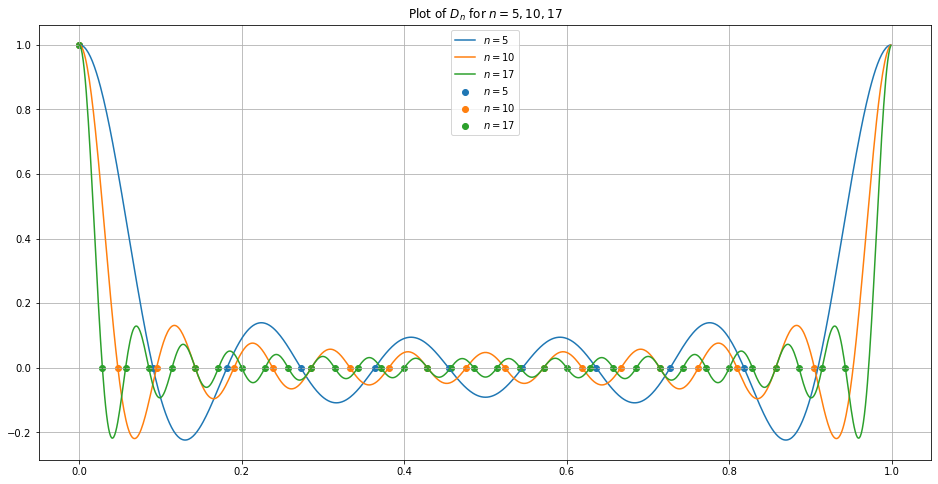

/tmp/ipykernel_561010/1864202003.py:5: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin((2*n+1)*np.pi*x)/((2*n+1)*np.sin(np.pi*x))
/tmp/ipykernel_561010/1864202003.py:5: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin((2*n+1)*np.pi*x)/((2*n+1)*np.sin(np.pi*x))
/tmp/ipykernel_561010/1864202003.py:5: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin((2*n+1)*np.pi*x)/((2*n+1)*np.sin(np.pi*x))


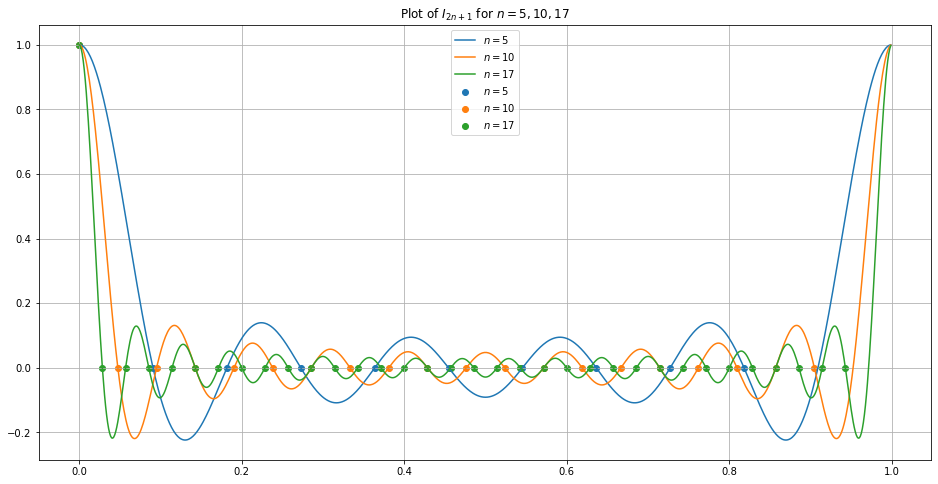

In [6]:
def Dn(x,n):
    return (1/(2*n+1))*np.sum(np.array([np.exp(2*np.pi*1j*x*k) for k in range(-n,n+1)]),axis = 0)

def In_Dn(x,n):
    y = np.sin((2*n+1)*np.pi*x)/((2*n+1)*np.sin(np.pi*x))
    y[np.isnan(y)] = 1
    return y


x = np.linspace(0,1,800, endpoint = False)
N_array = [5,10,17]

fig,ax = plt.subplots(figsize = (16,8))
ax.set_title("Plot of $D_n$ for $n=5,10,17$")
for n in N_array:
    ax.plot(x,np.real(Dn(x,n)), label = f"$n=${n}")
    ax.scatter(np.arange(0,2*n)/(2*n+1),np.append([1],np.zeros(2*n-1)), label = f"$n=${n}")
ax.legend()
ax.grid(True)
plt.show()

fig,ax = plt.subplots(figsize = (16,8))
ax.set_title("Plot of $I_{2n+1}$ for $n=5,10,17$")
for n in N_array:
    ax.plot(x,np.real(In_Dn(x,n)), label = f"$n=${n}")
    ax.scatter(np.arange(0,2*n)/(2*n+1),np.append([1],np.zeros(2*n-1)), label = f"$n=${n}")
ax.legend()
ax.grid(True)
plt.show()

### b)

Similiar argument for the existance of the fundamental interpolant in 3a), but now for 

$$
\sum_{z\in\mathbb{Z}}c_{h+(2n)z}(D_n) \neq 0 \hspace{0.4cm} \text{for }h = 0,1,\dots,2n-1.
$$

In this case however for $h=n$ both $c_{-n}(D_n)$ and $c_n(D_n)$ contribute to the sum, for the rest there is still inly one term that is non-zero. Thus for $h\neq n$ we get

$$
\sum_{z\in\mathbb{Z}}c_{h+(2n)z}(D_n) = \frac{1}{2n+1}\neq 0
$$

and for $h=n$

$$
\sum_{z\in\mathbb{Z}}c_{h+(2n)z}(D_n) = c_{-n}(D_n)+c_n(D_n) = \frac{2}{2n+1}\neq 0,
$$

hence the fundamental interpolant exists in $V_{2n,D_n}$.

Looking at the closed form of $D_n(x)$ it is posible to see that the function 

$$
I_{2n}(x) = \frac{\sin{2\pi n x}}{2n\sin{\pi x}}
$$

satisfies the requirements for the fundamental interpolant, where $\frac{\sin{2\pi n x}}{2n\sin{\pi x}}$ is defined to be 1 at $x=0$.

The two functions below implement $I_{2n}$ and plots it on the interval $\left[0,1\right)$ for $n=5,10,17$. Points are also placed where the funciton are equal to 1 or 0.

/tmp/ipykernel_561010/658016035.py:2: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(2*np.pi*n*x)/(2*n*np.sin(np.pi*x))
/tmp/ipykernel_561010/658016035.py:2: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(2*np.pi*n*x)/(2*n*np.sin(np.pi*x))
/tmp/ipykernel_561010/658016035.py:2: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(2*np.pi*n*x)/(2*n*np.sin(np.pi*x))


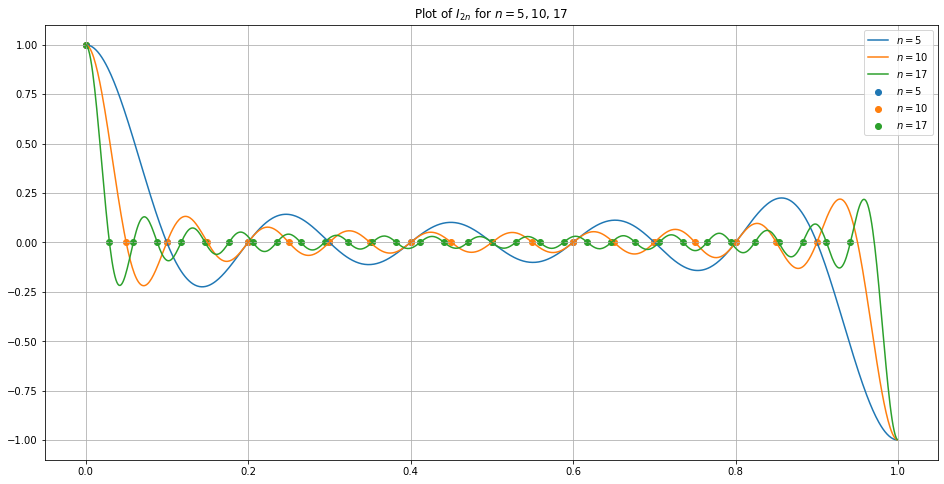

In [7]:
def modified_Dn(x,n):
    y = np.sin(2*np.pi*n*x)/(2*n*np.sin(np.pi*x))
    y[np.isnan(y)] = 1
    return y

fig,ax = plt.subplots(figsize = (16,8))
ax.set_title("Plot of $I_{2n}$ for $n=5,10,17$")
for n in N_array:
    ax.plot(x,np.real(modified_Dn(x,n)), label = f"$n=${n}")
    ax.scatter(np.arange(2*n-1)/(2*n),np.append([1],np.zeros(2*n-2)), label = f"$n=${n}")
ax.legend()
ax.grid(True)
plt.show()

This differs from the fundamental interpolant from $V_{2n+1,D_n}$ by that the zeros are more spaced on the interval and the interpolent here approaches -1 when $x=1$.

The cell blocks below retrives the signal data and defines the necessary variables to do the interpolations.

In [8]:
signals = np.genfromtxt('project2-data/signals.csv', delimiter=',')[1:,:]
print(signals.shape)

(8192, 6)


In [9]:
s5 = signals[:,5]
n = len(s5)//2
xd = np.arange(0,2*n)/(2*n)

Below the interpolation is done by doing a linear combination of the modified Dirichlet kernel, by using that $s_j\tau_{2n}^j I_{2n}(0) = s_j$ and zero for the other equidistanced points. The interpolation has 4 times as many points than the original signal s5, and thus has higher resolution.

In [10]:
n_extra = 3
x = np.linspace(xd[0],xd[-1],(n_extra+1)*(2*n),endpoint = False)
s6 = np.zeros((n_extra+1)*(2*n), dtype = complex)

for i in range(2*n):
    s6 += s5[i]*modified_Dn(x-i/(2*n),n)

/tmp/ipykernel_561010/658016035.py:2: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(2*np.pi*n*x)/(2*n*np.sin(np.pi*x))


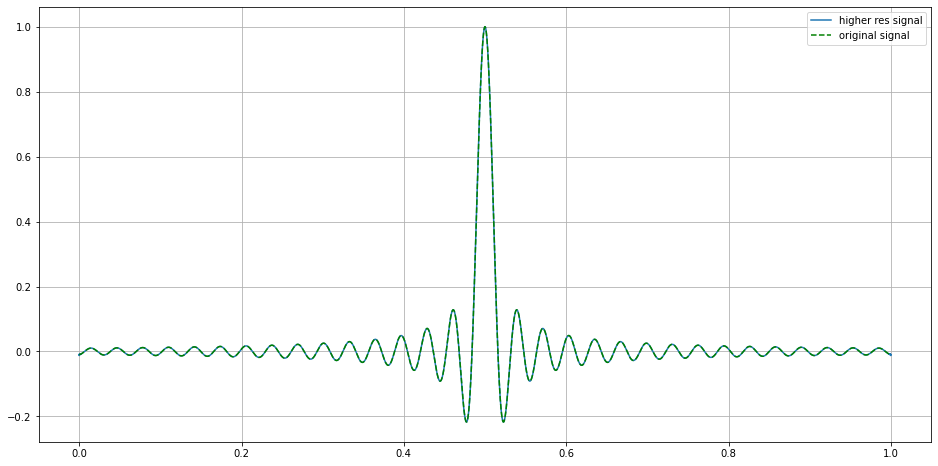

In [11]:
fig,ax = plt.subplots(figsize = (16,8))
ax.plot(x,np.real(s6), label = "higher res signal")
ax.plot(xd,s5,'g--',label = "original signal")
ax.legend()
ax.grid(True)
plt.show()

Can see here that the interpolation worked. Furthermore, since there are 4 times as many points, it means that for any two points in the sampled signal this higher resolution signal has 3 extra data points.

### c)

For it to be the case that $g=D_{\frac{n}{2}}\in V_{2n,D_n}$ for even $n$ then there must exists constants $a_j$ for $j=0,\dots,2n-1$ such that

$$
D_{\frac{n}{2}} = \sum_{j=0}^{2n-1}a_j\tau_{2n}^j D_n(x) = \sum_{j=0}^{2n-1}a_j D_n(x-\frac{j}{2n}).
$$

If the $a_j$ exists if and only if $\hat{a}_j$ also exists. From 2e) it was shown that if $g\in V_{N,f}$ then it is equivalent to that 

$$
c_k(g) = 2n\hat{a}_h c_k(f) \hspace{0.4cm} k\in\mathbb{Z}
$$

with $k = h+2nz$ for $h=0,\dots,2n-1$ or $h=k\bmod 2n$. From the definition of $D_{\frac{n}{2}}$ the fouiercoefficients are $c_q(D_{\frac{n}{2}})=\frac{1}{n+1}$ for $|q|\leq \frac{n}{2}$ and zero for $|q|>\frac{n}{2}$. Since $c_q(D_n)$ is non-zero for $|q|\leq \frac{n}{2}$ then these equations have a solutions $\hat{a}_h$ for $h=0,\dots,2n-1$. This means that the $a_j$ for $j=0,\dots,2n-1$ also exists, which means that there exists $a_j$ such that

$$
D_{\frac{n}{2}} = \sum_{j=0}^{2n-1}a_j\tau_{2n}^j D_n(x) = \sum_{j=0}^{2n-1}a_j D_n(x-\frac{j}{2n}),
$$

and thus it must be that $D_{\frac{n}{2}}\in V_{2n,D_n}$.

Using the equations described and solving them gives that

\begin{align}
    \hat{a}_h = \begin{cases}
       \frac{2n+1}{2n(n+1)} &\quad h\in\{0,\dots,\frac{n}{2},\frac{3n}{2},\dots,2n-1\}\\
       0&\quad h\in\{\frac{n}{2}+1,\dots,\frac{3n}{2}-1\}
    \end{cases}
\end{align}

Can then find the $a_j$'s by taking the inverse fouerier transform $(\mathcal{F}_{2n}^{-1} = 2n\overline{\mathcal{F}_{2n}})$ on the vector $\pmb{\hat{a}} = (\hat{a}_0,\dots,\hat{a}_{2n-1})^T$, or $\pmb{a} = 2n\overline{\mathcal{F}_{2n}}\pmb{\hat{a}}$. This gives that

$$
a_j = \sum_{k=0}^{2n-1}\hat{a}_k e^{2\pi i k j/2n} = \frac{2n+1}{2n(n+1)}\left(\sum_{k=0}^{\frac{n}{2}}e^{2\pi i k j/2n}+\sum_{k=\frac{3n}{2}}^{2n-1}e^{2\pi i k j/2n}\right)
$$

### d)

Want to now show that if a function $E_{\frac{n}{2}}$ is constructed by $c_{h+2nz}(E_{\frac{n}{2}}) = 2n\hat{b}_h c_{h+2nz}(D_n)$ for $h=0,1,\dots,2n-1$ and $z\in\mathbb{z}$, where $\hat{b}_h = \hat{a}_{h+n\bmod 2n}e^{-h\pi i/n}$ and the $\hat{a}_h$ are the ones from 3c), that

$$
\inprod{f}{g} = 0 \hspace{0.3cm}\text{for all}\hspace{0.3cm} f\in W_{n,E_{\frac{n}{2}}},g\in W_{n,D_{\frac{n}{2}}}.
$$

Will do this by showing that $\inprod{\tau_n^j E_{\frac{n}{2}}}{\tau_n^l D_{\frac{n}{2}}} = 0$, $j,l = 0,1,\dots,2n-1$ by using parseval's identity

\begin{align}
    \inprod{\tau_n^j E_{\frac{n}{2}}}{\tau_n^l D_{\frac{n}{2}}} &= \sum_{k\in\mathbb{Z}}c_k(\tau_n^j E_{\frac{n}{2}})\overline{c_k(\tau_n^l D_{\frac{n}{2}})} = \sum_{k\in\mathbb{Z}}e^{-2\pi i k(j-l)/n}c_k(E_{\frac{n}{2}})\overline{c_k(D_{\frac{n}{2}})}\\
    &= \frac{1}{n+1}\sum_{k=-\frac{n}{2}}^{\frac{n}{2}} e^{-2\pi i k(j-l)/n}c_k(E_{\frac{n}{2}})\\
\end{align}

Have to now adhead to that for $c_{h+2nz}(E_{\frac{n}{2}}) = 2n\hat{b}_h c_{h+2nz}(D_n)$ it is used that $k=h+2nz$, or $h=k\bmod 2n$. Since in this case $k\in\left\{-\frac{n}{2},\dots,\frac{n}{2}\right\}$ it means that $h = k$ when $k\in \left\{0,\dots,\frac{n}{2}\right\}$ and $h = k+2n$ when $k\in \left\{-\frac{n}{2},\dots,-1\right\}$. Have to then consider $h+n\bmod 2n$ for both cases. For $k\in \left\{0,\dots,\frac{n}{2}\right\}$ it is clear that $h+n\bmod 2n = k+n\bmod 2n = k+n$, as $k+n\leq \frac{3n}{2}$ here. For $k\in \left\{-\frac{n}{2},\dots,-1\right\}$ it is the case that $h+n\bmod 2n = k+3n\bmod 2n = k+n$. Thus, for $k\in\left\{-\frac{n}{2},\dots,\frac{n}{2}\right\}$ it must be that $\hat{a}_{h+n\bmod 2n} = \hat{a}_{k+n}$. This gives

\begin{align}
    \inprod{\tau_n^j E_{\frac{n}{2}}}{\tau_n^l D_{\frac{n}{2}}} &= \frac{1}{n+1}\sum_{k=-\frac{n}{2}}^{\frac{n}{2}} e^{-2\pi i k(j-l)/n}c_k(E_{\frac{n}{2}})\\
    &= \frac{2n}{n+1}\sum_{k=0}^{\frac{n}{2}} e^{-2\pi i k(j-l)/n}\hat{a}_{k+n}e^{-k\pi i /n}c_k(D_n) + \frac{2n}{n+1}\sum_{k=-\frac{n}{2}}^{-1} e^{-2\pi i k(j-l)/n}\hat{a}_{k+n}e^{-(k+n)\pi i /n}c_k(D_n)\\
     &= \frac{2n}{(2n+1)(n+1)}\sum_{k=0}^{\frac{n}{2}} e^{-2\pi i k(j-l)/n}\hat{a}_{k+n}e^{-k\pi i /n} + \frac{2n}{(2n+1)(n+1)}\sum_{k=-\frac{n}{2}}^{-1} e^{-2\pi i k(j-l)/n}\hat{a}_{k+n}e^{-(k+2n)\pi i /n}
\end{align}

From the $\hat{a}_j$ in 3c) it is the case here that $\hat{a}_{k+n} = 0$ for $k=-\frac{n}{2}+,\dots,\frac{n}{2}-1$, but not when $k=-\frac{n}{2},\frac{n}{2}$, which give that $\hat{a}_{\frac{n}{2}}=\hat{a}_{\frac{3n}{2}} = \frac{2n+1}{2n(n+1)}$. Thus the inner product becomes

\begin{align}
    \inprod{\tau_n^j E_{\frac{n}{2}}}{\tau_n^l D_{\frac{n}{2}}} &= \frac{1}{(n+1)^2} e^{-\pi i (j-l)}e^{-\pi i /2} + \frac{1}{(n+1)^2}e^{\pi i k(j-l)}e^{-5\pi i /2}\\
    &= \frac{1}{(n+1)^2} e^{-\pi i (j-l)}e^{-\pi i /2} + \frac{1}{(n+1)^2}e^{\pi i k(j-l)}e^{-\pi i /2}\\
    &= \frac{2}{(n+1)^2}\cos{\left(\frac{\pi}{2}+\pi(j-l)\right)} = 0,
\end{align}

since $j,l$ are integers. Hence the translations of $E_{\frac{n}{2}}$ and $D_{\frac{n}{2}}$ are orthogonal to each other. Since any $f\in W_{n,E_{\frac{n}{2}}}$ and $g\in W_{n,D_{\frac{n}{2}}}$ are a linear combination of translations of respectfully $E_{\frac{n}{2}}$ and $D_{\frac{n}{2}}$, and that the inner product is bilinear, the it must be that $\inprod{f}{g}=0$ for all $f\in W_{n,E_{\frac{n}{2}}}$ and $g\in W_{n,D_{\frac{n}{2}}}$. 

### e)

Can from $c_k(E_{\frac{n}{2}}) = 2n \hat{a}_{h+n\bmod 2n} c_k(D_n)$ it can be determined that

$$
c_k(E_{\frac{n}{2}}) = \begin{cases}
\frac{1}{n+1}e^{-k\pi i/n} &\quad -n\geq k\geq -\frac{n}{2} \text{ and } \frac{n}{2}\geq k\geq n\\
0&\quad \text{else}
\end{cases}.
$$

Using this it is possible to find a closed form of $E_{\frac{n}{2}}$, which is

\begin{align}
    E_{\frac{n}{2}} &= \frac{1}{n+1}\left(\sum_{k = -n}^{-\frac{n}{2}}e^{2\pi i k(x-\frac{1}{2n})}+\sum_{k = \frac{n}{2}}^{n}e^{2\pi i k(x-\frac{1}{2n})}\right) = \frac{1}{n+1}\left(\sum_{k = \frac{n}{2}}^{n}e^{-2\pi i k(x-\frac{1}{2n})}+\sum_{k = \frac{n}{2}}^{n}e^{2\pi i k(x-\frac{1}{2n})}\right)\\
    &= \frac{1}{n+1}\left(e^{-\pi i n(x-\frac{1}{2n})}\sum_{k = 0}^{\frac{n}{2}}e^{-2\pi i k(x-\frac{1}{2n})}+e^{\pi i n(x-\frac{1}{2n})}\sum_{k = 0}^{\frac{n}{2}}e^{2\pi i k(x-\frac{1}{2n})}\right)\\
    &= \frac{1}{n+1}\left(e^{-\pi i n(x-\frac{1}{2n})}\frac{e^{-2\pi i (\frac{n}{2}+1)(x-\frac{1}{2n})}-1}{e^{-2\pi i(x-\frac{1}{2n})}-1}+e^{\pi i n(x-\frac{1}{2n})}\frac{e^{2\pi i (\frac{n}{2}+1)(x-\frac{1}{2n})}-1}{e^{2\pi i(x-\frac{1}{2n})}-1}\right)\\
    &=\frac{1}{n+1}\left(e^{-\pi i \frac{3n}{2}(x-\frac{1}{2n})}\frac{\sin{\left(\pi(\frac{n}{2}+1)(x-\frac{1}{2n})\right)}}{\sin{\left(\pi(x-\frac{1}{2n})\right)}}+e^{\pi i \frac{3n}{2}(x-\frac{1}{2n})}\frac{\sin{\left(\pi(\frac{n}{2}+1)(x-\frac{1}{2n})\right)}}{\sin{\left(\pi(x-\frac{1}{2n})\right)}}\right)\\
    &= \frac{2}{n+1}\frac{\sin{\left(\pi(\frac{n}{2}+1)(x-\frac{1}{2n})\right)}}{\sin{\left(\pi(x-\frac{1}{2n})\right)}}\cos{\left(\frac{3n}{2}\pi (x-\frac{1}{2n})\right)}
\end{align}

Functions that generates the fourier coefficients of $E_{\frac{n}{2}}$ and calculates $E_{\frac{n}{2}}$ in closed form.

In [12]:
def generate_ckf_En2(n):
    ckf = np.zeros(2*n+1,dtype = complex)
    
    for i in range(-n,n+1):
        if -n<= i <= -n/2 or n/2<= i <= n:
            ckf[i+n] = np.exp(-i*np.pi*1j/n)
    
    return ckf

def En2(x,n):
    y = np.sin(np.pi*(n/2+1)*(x-1/(2*n)))/np.sin(np.pi*(x-1/(2*n)))
    y[np.isnan(y)] = 1/(n/2+1)
    return 2*np.cos(np.pi*(3*n/2)*(x-1/(2*n)))*y/(n+1)

def En22(x,n):
    ygrid = np.zeros(len(x),dtype = complex)
    
    for i in range(-n,n+1):
        if -n<= i <= -n/2 or n/2<= i <= n:
            ygrid += np.exp(2*np.pi*1j*i*(x-1/(2*n)))
    
    return ygrid/(n+1)

The code block below retrives 1024 sample points of the signals s1, s2 and s3.

In [13]:
s1 = signals[:,1]
n = 512
l = len(s1)//(2*n)
s1 = signals[:,1][::l]
s2 = signals[:,2][::l]
s3 = signals[:,3][::l]
xd = np.arange(0,2*n)/(2*n)

In [14]:
ckf_Dn = np.ones(2*n+1)/(2*n+1)

a_Dn = interpolate(s1,ckf_Dn)

Dn_grid = np.zeros(2*n, dtype = complex)

for i in range(2*n):
    Dn_grid += a_Dn[i]*Dn(xd-i/(2*n),n)

In [15]:
ckf_En2 = generate_ckf_En2(n)
ckf_Dn2 = np.zeros(2*n+1)
ckf_Dn2[-n//2:n//2+1] = 1/(n+1)

#Did not work
#a_En2 = interpolate(Dn_grid,ckf_En2)
#a_Dn2 = interpolate(Dn_grid,ckf_Dn2)

## Task 4

### a)

In the task below we are going to perform the 2D discrete Fourier transform of barbara.gif and klaus.gif. Further we will change their phases and plot the results

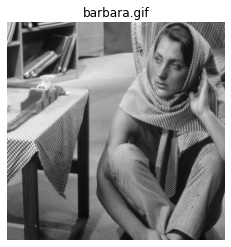

In [16]:
# importing image
barbara = mpimg.imread('project2-data/barbara.gif')
plt.set_cmap("gray")
plt.axis("off")
imgplot = plt.imshow(barbara)
plt.title('barbara.gif')
plt.show()

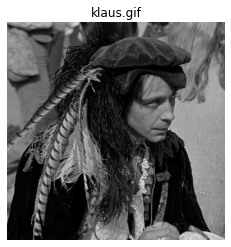

In [17]:
# importing image
klaus = mpimg.imread('project2-data/klaus.gif')
plt.set_cmap("gray")
plt.axis("off")
imgplot = plt.imshow(klaus)
plt.title('klaus.gif')
plt.show()

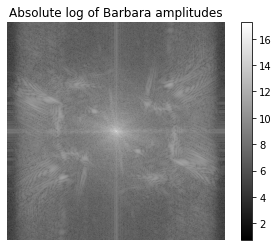

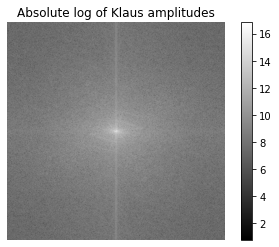

In [18]:
# Calculate Fourier transform of barbara and plotting the result
ft = np.fft.ifftshift(barbara)
ft = np.fft.fft2(ft)
ft_barbara = np.fft.fftshift(ft)

phi_barbara = np.angle(ft_barbara)

plt.imshow(np.log(abs(ft_barbara)))
plt.axis("off")
plt.colorbar()
plt.title('Absolute log of Barbara amplitudes')
plt.show()

# Calculate Fourier transform of klaus and plotting the result
ft = np.fft.ifftshift(klaus)
ft = np.fft.fft2(ft)
ft_klaus = np.fft.fftshift(ft)

phi_klaus = np.angle(ft_klaus)

plt.imshow(np.log(abs(ft_klaus)))
plt.axis("off")
plt.colorbar()
plt.title('Absolute log of Klaus amplitudes')
plt.show()

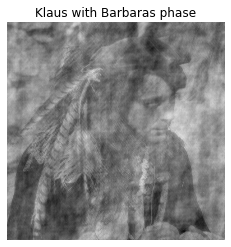

In [19]:
# changing the phase of barbara and klaus

ft_barbara = abs(ft_barbara)*np.exp(1j*phi_klaus)

ft_klaus = abs(ft_klaus)*np.exp(1j*phi_barbara)

# Calculate the inverse Fourier transform of barbara
ift = np.fft.ifftshift(ft_barbara)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part
plt.imshow(ift)
plt.axis("off")
plt.title('Klaus with Barbaras phase')
plt.show()

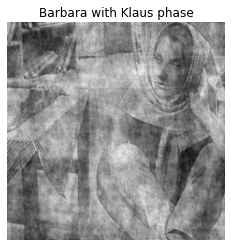

In [20]:
# Calculate the inverse Fourier transform of klaus
ift = np.fft.ifftshift(ft_klaus)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part
plt.imshow(ift)
plt.axis("off")
plt.title('Barbara with Klaus phase')
plt.show()

An image can be seen as a weighted sum between its phases and amplitudes. When we change the phases in the images, we weight the various phases differently. For that reason, the pictures will become as above. This gives an effect of how the images would have turned out if we overlapped them. 

### b)

We want to examine images with half-toning, and how we can use the Fourier transform to remove the dot-artefacts. This is done for three images below.

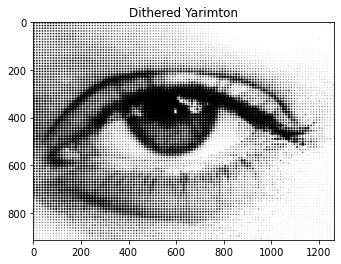

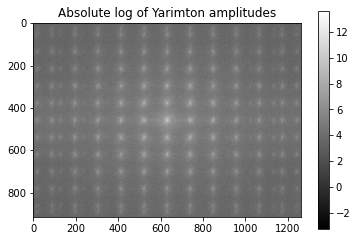

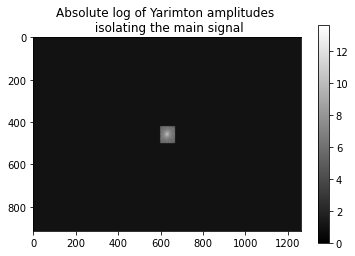

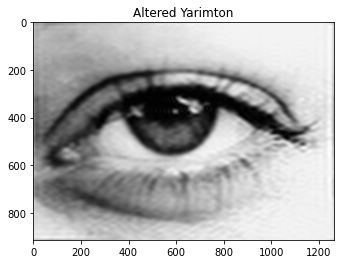

In [21]:
yarimton = plt.imread("project2-data/Yarimton-dithered.png")

yarimton = cv2.cvtColor(yarimton, cv2.COLOR_BGR2GRAY)

plt.imshow(yarimton)
plt.title('Dithered Yarimton')
plt.show()

# Calculate Fourier transform of yarimton
ft = np.fft.ifftshift(yarimton)
ft = np.fft.fft2(ft)
ft_yarimton = np.fft.fftshift(ft)

yarimton_amplitude = np.log(abs(ft_yarimton))

lowerBound = 0
upperBound=1

plt.imshow(yarimton_amplitude)
plt.colorbar()
plt.title('Absolute log of Yarimton amplitudes')
plt.show()

yarimton_amplitude[:,0:600] = np.clip(yarimton_amplitude[:,0:600],lowerBound,upperBound)
yarimton_amplitude[:,670:] = np.clip(yarimton_amplitude[:,670:],lowerBound,upperBound)
yarimton_amplitude[:420,] = np.clip(yarimton_amplitude[:420,:],lowerBound,upperBound)
yarimton_amplitude[500:,:] = np.clip(yarimton_amplitude[500:,:],lowerBound,upperBound)

plt.imshow(yarimton_amplitude)
plt.colorbar()
plt.title('Absolute log of Yarimton amplitudes \n isolating the main signal')
plt.show()

yarimton_phase = np.angle(ft_yarimton)

modified_yarimton = np.exp(yarimton_amplitude) * np.exp(1j *yarimton_phase)

# Calculate the inverse Fourier transform of yarimton
ift = np.fft.ifftshift(modified_yarimton)
ift = np.fft.ifft2(ift)
ift_yarimton = np.fft.fftshift(ift)

plt.imshow(np.abs(ift_yarimton))
plt.title('Altered Yarimton')
plt.show()

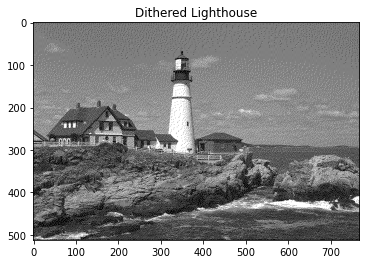

(512, 768)


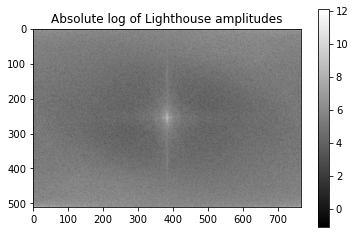

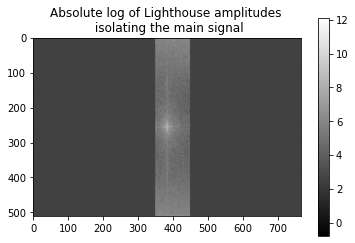

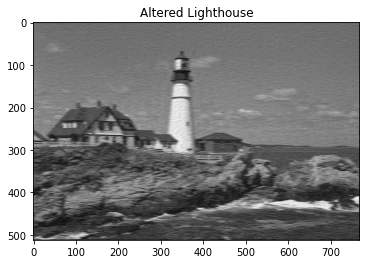

In [22]:
lighthouse = plt.imread("project2-data/lighthouse-dithered.png")

plt.imshow(lighthouse)
plt.title('Dithered Lighthouse')
plt.show()

# Calculate Fourier transform of lighthouse
ft = np.fft.ifftshift(lighthouse)
ft = np.fft.fft2(ft)
ft_lighthouse = np.fft.fftshift(ft)

lighthouse_amplitude = np.log(abs(ft_lighthouse))

lowerBound = 0
upperBound = 2.5

print(lighthouse_amplitude.shape)

plt.imshow(lighthouse_amplitude)
plt.colorbar()
plt.title('Absolute log of Lighthouse amplitudes')
plt.show()

lighthouse_amplitude[0:512,0:350] = np.clip(lighthouse_amplitude[0:512,0:350],lowerBound,upperBound)
lighthouse_amplitude[0:512,450:] = np.clip(lighthouse_amplitude[0:512,450:],lowerBound,upperBound)

plt.imshow(lighthouse_amplitude)
plt.colorbar()
plt.title('Absolute log of Lighthouse amplitudes \n isolating the main signal')
plt.show()

lighthouse_phase = np.angle(ft_lighthouse)

modified_lighthouse = np.exp(lighthouse_amplitude) * np.exp(1j *lighthouse_phase)

# Calculate the inverse Fourier transform of yarimton
ift = np.fft.ifftshift(modified_lighthouse)
ift = np.fft.ifft2(ift)
ift_lighthouse = np.fft.fftshift(ift)

plt.imshow(np.abs(ift_lighthouse))
plt.title('Altered Lighthouse')
plt.show()

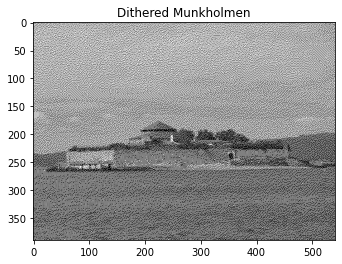

(390, 541)


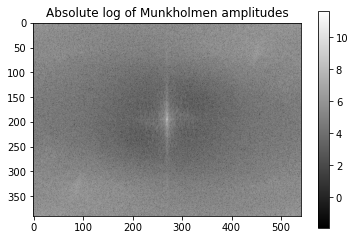

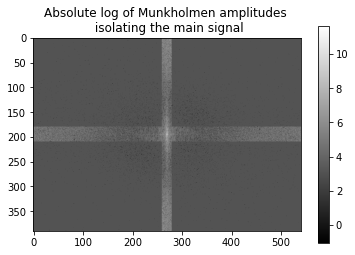

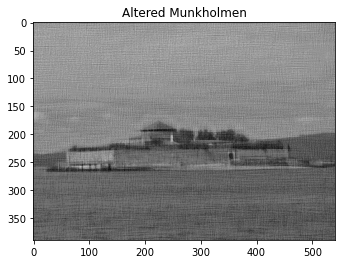

In [23]:
munkholmen = plt.imread("project2-data/munkholmen-dithered.png")

plt.imshow(munkholmen)
plt.title('Dithered Munkholmen')
plt.show()

# Calculate Fourier transform of munkholmen
ft = np.fft.ifftshift(munkholmen)
ft = np.fft.fft2(ft)
ft_munkholmen = np.fft.fftshift(ft)

munkholmen_amplitude = np.log(abs(ft_munkholmen))

lowerBound = 0
upperBound = 3.1

print(munkholmen_amplitude.shape)

plt.imshow(munkholmen_amplitude)
plt.colorbar()
plt.title('Absolute log of Munkholmen amplitudes')
plt.show()

munkholmen_amplitude[0:180,0:260] = np.clip(munkholmen_amplitude[0:180,0:260],lowerBound,upperBound)
munkholmen_amplitude[0:180,280:] = np.clip(munkholmen_amplitude[0:180,280:],lowerBound,upperBound)
munkholmen_amplitude[210:,0:260] = np.clip(munkholmen_amplitude[210:,0:260],lowerBound,upperBound)
munkholmen_amplitude[210:,280:] = np.clip(munkholmen_amplitude[210:,280:],lowerBound,upperBound)

plt.imshow(munkholmen_amplitude)
plt.colorbar()
plt.title('Absolute log of Munkholmen amplitudes \n isolating the main signal')
plt.show()

munkholmen_phase = np.angle(ft_munkholmen)

modified_munkholmen = np.exp(munkholmen_amplitude) * np.exp(1j *munkholmen_phase)

# Calculate the inverse Fourier transform of munkholmen
ift = np.fft.ifftshift(modified_munkholmen)
ift = np.fft.ifft2(ift)
ift_munkholmen = np.fft.fftshift(ift)

plt.imshow(np.abs(ift_munkholmen))
plt.title('Altered Munkholmen')
plt.show()

Each image is made up of sinusoidal gratings. What the fourier transform has the ability to do is extract the amplitude, frequency, orientation and phase of such a sinusoidal grating. If you plot the amplitudes, you will see that most of the information in the image lies in the highest amplitude value. We want to preserve this value of the amplitude, but want to remove other amplitudes that have a lower value. By doing this, you can remove some noise from the image.

In the first example, we see that the values for the amplitudes are very discrete, and we can therefore very easily isolate the largest amplitude.

In the other images, the contrast between the image itself and the dot artefacts is smaller, and the amplitudes are no longer as discrete. This causes us to remove some more information about the image, and the reconstructed image becomes more blurry.

### c)

A tensor product between $V_{N_1,f_1}(x)$ and $V_{N_2, f_2}(x)$ will give us all possible combinations between the shifts. We can for example shift by two in one direction and by four in the other direction. This will yield a 2D-grid. Can then interpolate the picture a linear combination of translations in both directions using the tensor product of dirichlet kernel, by using $D_{\pmb{N}}(\pmb{x}) = D_{N_1}(x_1)D_{N_2}(x_2)$. This would lead to a being able to write a $g\in V_{\pmb{N},F}$ with $F(\pmb{x}) = D_{\pmb{N}}(\pmb{x})$ on the form

$$
g(\pmb{x}) = \sum_{k = 0}^{N_1-1}\sum_{j=0}^{N_2-1} a_{i,j} D_{N_1}\left(x_1-\frac{k}{N_1}\right)D_{N_2}\left(x_2-\frac{j}{N_2}\right).
$$